<a href="https://colab.research.google.com/github/hargurjeet/bt/blob/main/EDA_and_Visualization_NY_city_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
## Perfoming the required imports
import pandas as pd
import numpy as np

## Libraires for building visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
required_cols = ['fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']

dtypes = {
    'fare_amount' : 'float32', 
    'pickup_datetime': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

file_path = 'https://raw.githubusercontent.com/hargurjeet/bt/main/ny_taxi_fare_data.csv'
df = pd.read_csv(file_path, 
                 usecols = required_cols, 
                 parse_dates=['pickup_datetime'],
                 dtype = dtypes)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1


# Understanding the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float32            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float32            
 3   pickup_latitude    50000 non-null  float32            
 4   dropoff_longitude  50000 non-null  float32            
 5   dropoff_latitude   50000 non-null  float32            
 6   passenger_count    50000 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 1.4 MB


key insights - 
- Dataset contatins no null values
- The columns data types parsed by pandas looks fine

In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364215,-72.521416,39.931904,-72.517723,39.924244,1.667840
std,9.685438,10.392804,6.224685,10.406597,6.014816,1.289195
min,-5.000000,-75.423851,-74.006889,-84.654243,-74.006378,0.000000
25%,6.000000,-73.992065,40.734879,-73.991150,40.734371,1.000000
50%,8.500000,-73.981842,40.752678,-73.980080,40.753372,1.000000
75%,12.500000,-73.967148,40.767361,-73.963585,40.768166,2.000000
max,200.000000,40.783470,401.083344,40.851028,43.415192,6.000000


Key Insights - 
- New york longitude and latitude is 40.73, -73.93 (source refer reference section)
- The dataset has longitude data ranges from -75 to 40 and latitude data ranges from -74 to 43, This looks highly suspectable.
- Considering the geographical limitations of city taxi, It would be a worth while excerise to consider records for latitude ranges from 40 - 42 and  ranges longtide from -72 to -75.
-  A maximum amount of 5 passengers are allowed in NY city taxi (source refer  reference section), The dataset contains passanges information from 0 to 6, Hence outlier can be removed.
-  Fare amount can not be -ve. Hence keeping only +ve values of fare amount

In [12]:
## Dataset records before cleaning

print('Record Count Before Cleaning', df.shape)

def data_cleanup(df):

  return df[(df.pickup_longitude>= -75) & (df.pickup_longitude<=-72) & (df.pickup_latitude>= 40) & (df.pickup_latitude <=42) & 
      (df.dropoff_latitude>=40) &(df.dropoff_latitude<=42)& (df.dropoff_longitude>=-75) &(df.dropoff_longitude<=-72) &
     (df.passenger_count >=1) & ((df.passenger_count <=5)) &(df.fare_amount>1)]

df_cleaned = data_cleanup(df)

print('Record Count After Cleaning', df_cleaned.shape)

Record Count Before Cleaning (50000, 7)
Record Count After Cleaning (47809, 7)


In [13]:
# Evaluating the dataset after the cleanup acitivity is completed
df_cleaned.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000,47809.000000
mean,11.343471,-73.986969,40.749271,-73.987190,40.749588,1.586521
std,9.654293,0.041516,0.030970,0.040838,0.033687,1.142503
min,2.500000,-74.711647,40.121655,-74.755478,40.164928,1.000000
25%,6.000000,-73.992332,40.736465,-73.991325,40.735931,1.000000
50%,8.500000,-73.982132,40.753391,-73.980492,40.754147,1.000000
75%,12.500000,-73.968422,40.767727,-73.965401,40.768520,2.000000
max,200.000000,-72.856972,41.650002,-72.854942,41.543217,5.000000


In [14]:
def min_max_date(df, date_col):
  return df[date_col].max(), df[date_col].min()

min_max_date(df_cleaned, 'pickup_datetime')

(Timestamp('2015-06-30 22:42:39+0000', tz='UTC'),
 Timestamp('2009-01-01 01:31:49+0000', tz='UTC'))

Key insights - 
- The minimum fare of yellow taxi seems to be 2.5 dollars
- 75% of rides are under 12.5 dollars and carried upto 2 passanges.
- All the rides data is from Jan 2009 to July 2015.

In [16]:
df_cleaned.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968094,40.768009,-73.956657,40.783764,1


## Analysing indivual features

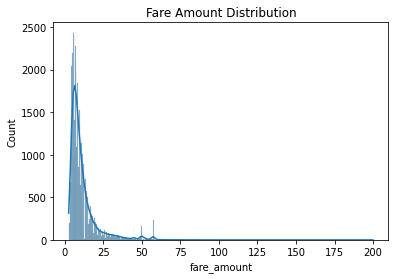

In [25]:
sns.histplot(data = df_cleaned, kde=True, x='fare_amount');
plt.title('Fare Amount Distribution');

This looks to be Right skewed histogram or positively skewed graph

Text(0.5, 1.0, 'Passangers Count Distribution')

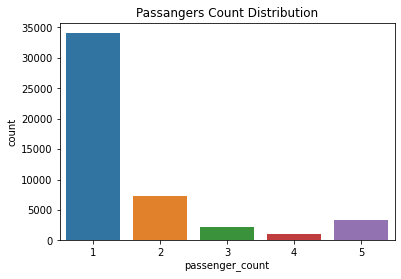

In [26]:
sns.countplot(data = df_cleaned, x='passenger_count');
plt.title('Passangers Count Distribution')

# References
- NY long and lat info - https://www.latlong.net/place/new-york-city-ny-usa-1848.html
- Amount of passangers allowed -  https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page